# Importing Dataset through URL

In [84]:
# Url of dataset
url = 'https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv'

In [85]:
# converting the url to raw url for reading
url = url.replace('github.com','raw.githubusercontent.com').replace('/blob/','/')

In [86]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

In [87]:
#reading csv data from url
df=pd.read_csv(url)

In [88]:
# looking at the data
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [89]:
#checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [90]:
#checking for null values
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

#### as we can see P6 and P7 have null values so i will drop those rows

In [91]:
df.dropna(inplace=True)
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [92]:
#statical data 
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,69.092308,3.946154,4.407692,4.311538,4.376923,1.992308,3.346154,5.369231,5.130769,5.400000,...,3.100000,2.800000,1.923077,2.492308,1.169231,2.500000,2.076923,2.169231,1.115385,4.482749e+06
std,39.998730,2.801748,1.480866,1.031040,1.007840,1.223137,2.089885,2.286253,1.831628,1.789721,...,1.671002,5.651919,3.395426,5.120632,1.725946,5.212165,3.494437,4.073241,1.789871,2.634010e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,35.250000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.963832e+06
50%,69.500000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.969426e+06
75%,103.750000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.256318e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


# Visualization

In [93]:
#city wise revenue
px.bar(df.groupby('City').sum().sort_values('revenue'),y='revenue',title='City wise revenue',color='revenue')

In [94]:
# type wise revenue
px.bar(df,x='Type',y='revenue',color='Type',title='Type wise revenue')

In [95]:
# city group wise revenue
px.histogram(df,x='City Group',y='revenue',color='City Group',title='City Group wise revenue')

In [96]:
#Converting City, City Group and Type column to categorical columns and encoding them (will be helpful in tree model)
df['City'] = df['City'].astype('category')
df['City Group'] = df['City Group'].astype('category')
df['Type'] = df['Type'].astype('category')

In [97]:
df['City'] = df['City'].cat.codes
df['City Group'] = df['City Group'].cat.codes
df['Type'] = df['Type'].cat.codes

In [98]:
#dropping id and date column
df.drop(['Id','Open Date'],axis=1,inplace=True)

# Feature Selection

<AxesSubplot:>

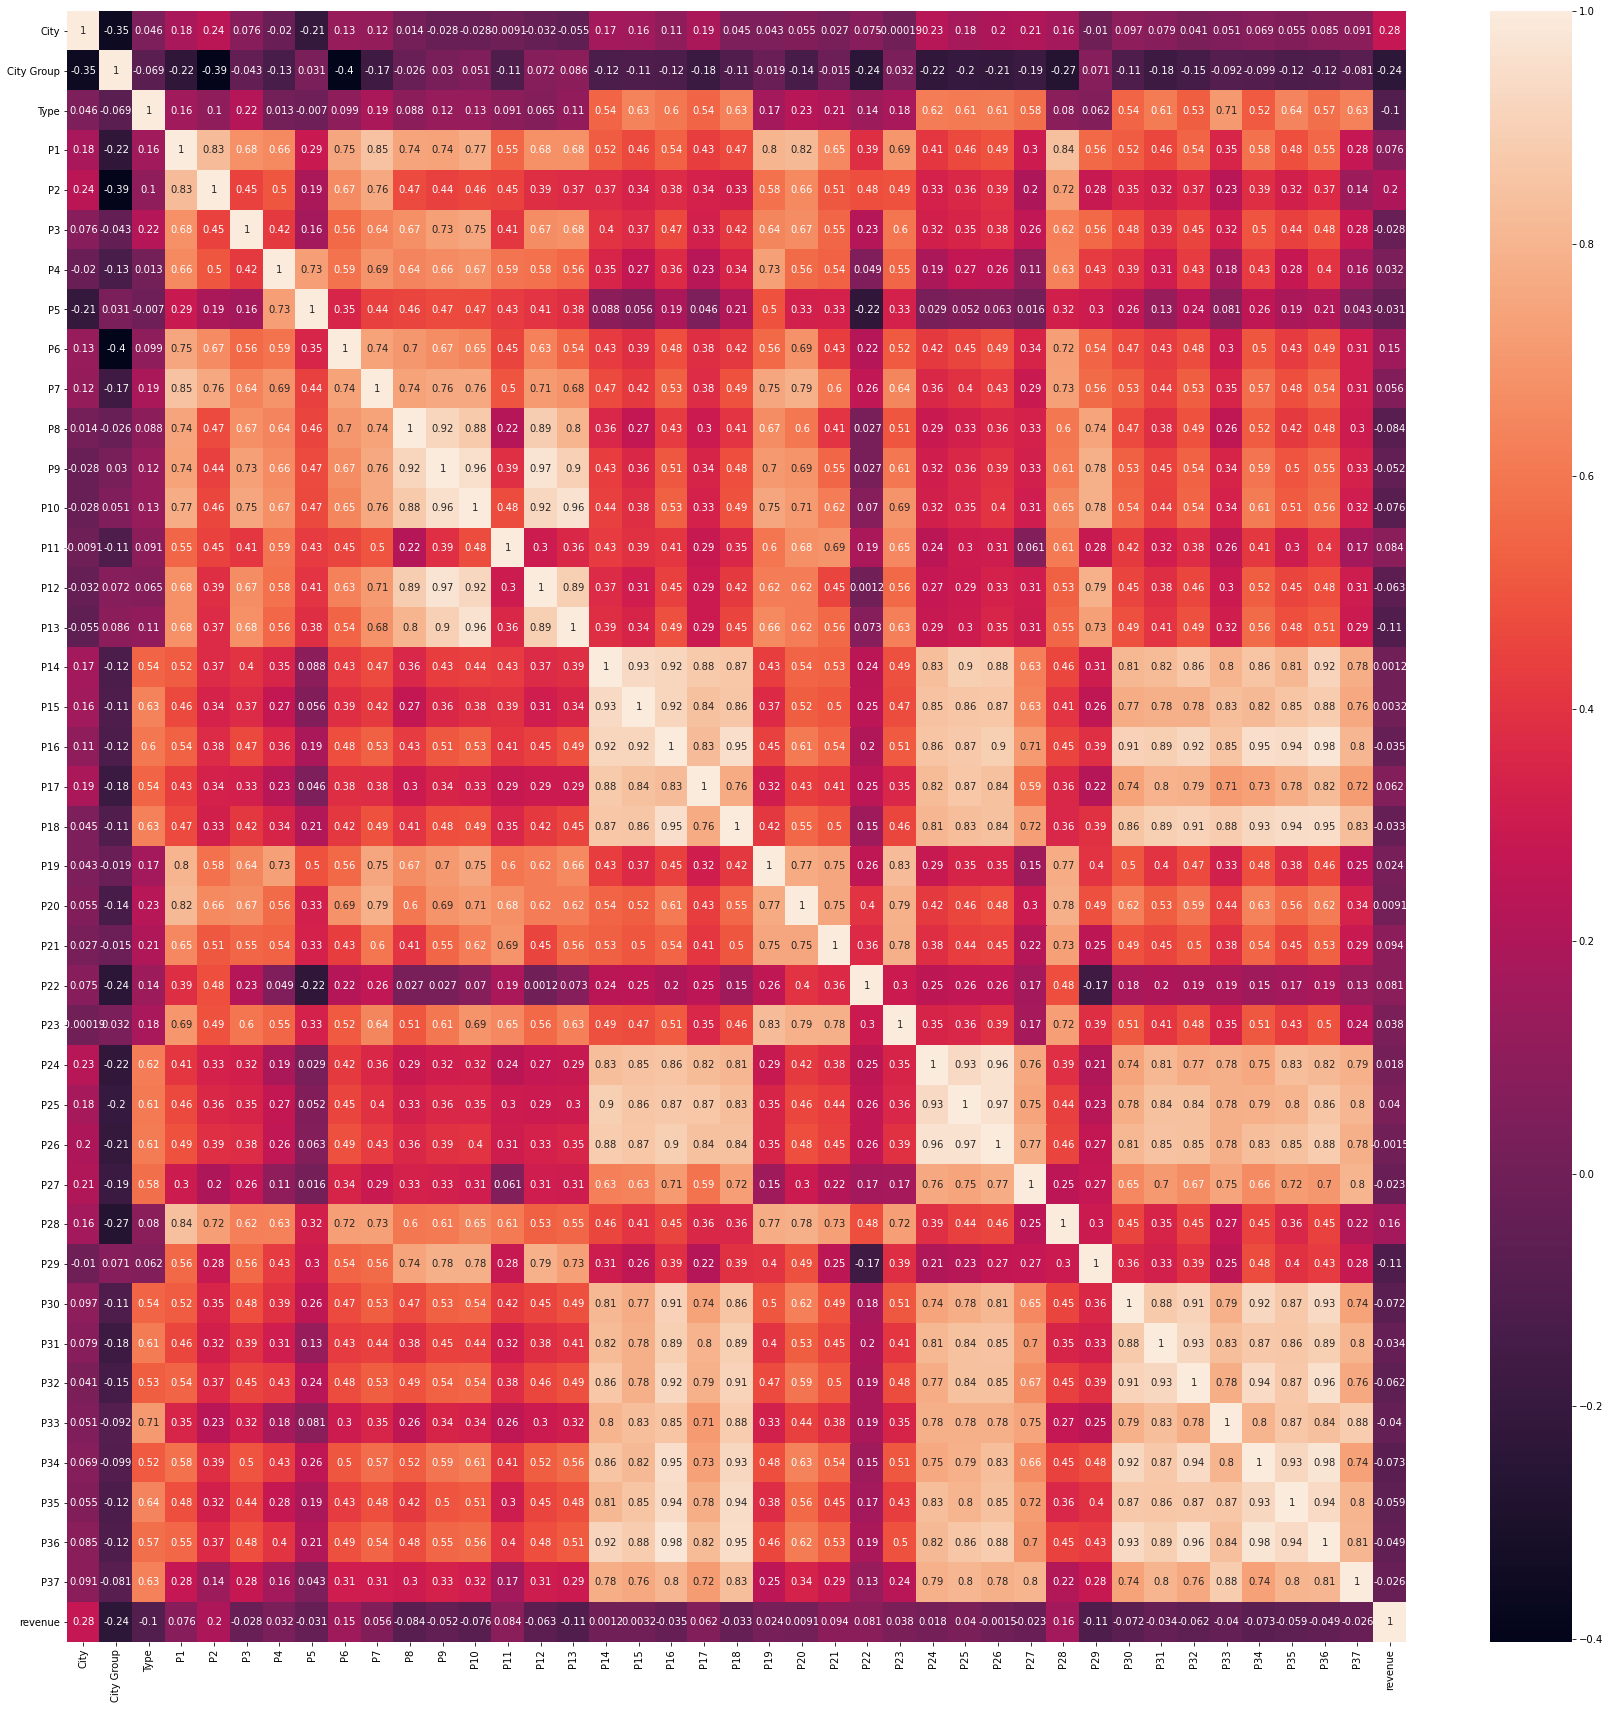

In [99]:
#using heatmap for corelation visuals
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)


# Lets create Model

In [100]:
#seperating dependent and independent values
X=df.drop(['revenue'],axis=1)
Y=df['revenue']

In [101]:
# Splitting the data into training and testing 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=5)

## Decision tree regressor

In [102]:
dr=DecisionTreeRegressor(random_state=5)

In [103]:
#fitting the model
dr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [104]:
#prediction
y_pred=dr.predict(X_test)

In [105]:
#scores
print('Scores :-')
print('\tTraining Score:', dr.score(X_train,y_train))
print('\tTesting Score:', dr.score(X_test,y_test))
print('\tR2 score: ',r2_score(y_test,y_pred))
print('\tRMSE score: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Scores :-
	Training Score: 1.0
	Testing Score: -1.8378854069781614
	R2 score:  -1.8378854069781614
	RMSE score:  5122163.002614405


## Random forest

In [106]:
rf=RandomForestRegressor(random_state=10)

In [107]:
#fitting the model
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [108]:
#prediction
y_pred1=rf.predict(X_test)

In [109]:
#scores
print('Scores :-')
print('\tTraining Score:', rf.score(X_train,y_train))
print('\tTesting Score:', rf.score(X_test,y_test))
print('\tR2 score: ',r2_score(y_test,y_pred))
print('\tRMSE score: ',np.sqrt(mean_squared_error(y_test,y_pred1)))

Scores :-
	Training Score: 0.8740515484096649
	Testing Score: -0.21743544071924092
	R2 score:  -1.8378854069781614
	RMSE score:  3354895.0410740217


## SVR

In [110]:
sv=SVR()

In [111]:
#fitting the model
sv.fit(X_train,y_train)

SVR()

In [112]:
#prediction
y_pred2=sv.predict(X_test)

In [113]:
#scores
print('Scores :-')
print('\tTraining Score:', sv.score(X_train,y_train))
print('\tTesting Score:', sv.score(X_test,y_test))
print('\tR2 score: ',r2_score(y_test,y_pred))
print('\tRMSE score: ',np.sqrt(mean_squared_error(y_test,y_pred2)))

Scores :-
	Training Score: -0.03037904463822838
	Testing Score: -0.14539925756493632
	R2 score:  -1.8378854069781614
	RMSE score:  3254126.3844612762


## Linear Regression

In [114]:
lr=LinearRegression()

In [115]:
#fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [116]:
#prediction
y_pred3=lr.predict(X_test)

In [117]:
#scores
print('Scores :-')
print('\tTraining Score:', lr.score(X_train,y_train))
print('\tTesting Score:', lr.score(X_test,y_test))
print('\tR2 score: ',r2_score(y_test,y_pred))
print('\tRMSE score: ',np.sqrt(mean_squared_error(y_test,y_pred3)))

Scores :-
	Training Score: 0.45075367546959555
	Testing Score: -0.4411889810174685
	R2 score:  -1.8378854069781614
	RMSE score:  3650198.094010419
